<h1><center><font size="6">Becoming an independent Data Scientist - Final Assignment</font></center></h1>

# Outline
- [Import necessary Libraries](#1)
- [Final Assignment - Task](#2)
- [Identifying the problem](#3)
- [Course of Action](#4)
- [My Solution](#5)
- [References](#6)

<a id='1'></a>
# Import necessary Libraries

In [1]:
# Import necessary libraries and print their versions
from platform import python_version
print(f"Python: {python_version()}")
import pandas as pd
print(f"Pandas: {pd.__version__}")
import numpy as np
print(f"Numpy: {np.__version__}")
import geopandas as gpd
print(f"Geopandas: {gpd.__version__}")
import matplotlib
print(f"Matplotlib: {matplotlib.__version__}")
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib widget

Python: 3.9.16
Pandas: 1.5.2
Numpy: 1.24.1
Geopandas: 0.12.2
Matplotlib: 3.6.3


<a id='2'></a>
# Final Assignment - Task
Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Osnabrück, Lower Saxony, Germany**, or **Germany** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Osnabrück, Lower Saxony, Germany** to Ann Arbor, USA. In that case at least one source file must be about **Osnabrück, Lower Saxony, Germany**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:
* State the region and the domain category that your data sets are about (e.g., **Osnabrück, Lower Saxony, Germany** and **sports or athletics**).
* You must state a question about the domain category and region that you identified as being interesting.
* You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
* You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
* You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

<a id='3'></a>
# Identifying the problem - Sports activities in Germany - Which regions in Germany are the most active in terms of sports?
When I was thinking about an assignment that was supposed to deal with the topic of sports in Germany, I looked at what the German statistical office (DESTATIS) had available. However, I did not find anything there. Nevertheless, I found out that VuMA had conducted a market media study in which German citizens were also asked about their sports behavior. So it was just right for my project.

It was important to me that the data was publicly accessible and could be downloaded in a suitable file format. I also wanted to divide the data into different regions of Germany, so that a demarcation between different parts of Germany could take place. Here I had first thought of counties, but that would quickly become very confusing with currently 294 counties and 107 independent cities. Therefore, I decided to use the next higher level, the federal states. After all, there are only 16 of these in Germany.

So the question now is: **Are there any particularly sporty federal states in Germany?**

<a id='4'></a>
# Course of Action
I have selected two different data sets from which to draw information:
1. Data on current sporty active people in the federal states in Germany - market media study (VuMA)
2. Geodata about the respective federal states in Germany (federal office of cartography and geodesy)

The code has the following function:
1. It retrieves, cleans, reorganizes and stores a table of the German states and the sporting activity in them as percentage.
2. After that a shp-file is imported and the coordinates for the 16 federal states in Germany are stored in a GEO-dataframe, these are needed for the final visualization.
3. In the penultimate step, all collected data is merged into a single dataframe and prepared for visualization.
4. Finally, a plot is shown in which the sporting activities (in percent) in the individual federal states can be seen in color. The respective frequency of sports activities can be changed with the help of a slider.

<a id='5'></a>
# My Solution
## Get the data on sports activities from [VUMA-Touchpoints](https://touchpoints.vuma.de/)
The data presented in this dataset are based on four survey periods (fall survey 2019, spring 2020, and fall 2021 surveys). The first two surveys thus predate the pandemic-related restrictions, while the two most recent waves fall during the period with everyday restrictions. Looking at the data, one nevertheless finds largely familiar behaviors that correspond to the magnitudes of the years before. This is certainly also due to the fact that - despite all the restrictions - life and sport continued, albeit in part differently than usual.

In [2]:
# Load the data from a downloaded xlsx file available and procured from VUMA Touchpoints
state1 = pd.read_excel("../data/VuMA--2022-04-26.xlsx", skiprows=5)
# Cleanup and reorganization of the data set
state1.drop([0, 1, 2], inplace=True)
state1.drop("Unnamed: 0", axis=1, inplace=True)
state1.rename(
    columns={
        "Unnamed: 1": "State",
        "Mache ich mehrmals in der Woche : Sport treiben": "Several times a week",
        "Mache ich mehrmals im Monat : Sport treiben": "Several times a month",
        "Mache ich etwa einmal im Monat : Sport treiben": "About once a month",
        "Mache ich seltener : Sport treiben": "Less often",
        "Mache ich nie : Sport treiben": "Never",
    },
    inplace=True,
)
state1.reset_index(drop=True)

,State,Several times a week,Several times a month,About once a month,Less often,Never
0,Schleswig-Holstein,21.2,16.3,4.6,10.9,47
1,Hamburg,18.4,16.4,7.5,19.4,38.3
2,Niedersachsen,19.6,20.2,6.6,14.9,38.7
3,Bremen,16.8,17,4.3,11.7,50.2
4,Nordrhein-Westfalen,20.2,24.9,2.7,9.7,42.4
5,Hessen,17.3,22.9,4.8,9.4,45.5
6,Rheinland-Pfalz,21.3,18.3,7.9,15.2,37.3
7,Baden-Württemberg,21.8,23.5,6.9,13.3,34.5
8,Bayern,25,21.5,7.6,11.7,34.2
9,Saarland,15.1,16.9,4.2,16.5,47.4


In [3]:
state1.dtypes

State                    object
Several times a week     object
Several times a month    object
About once a month       object
Less often               object
Never                    object
dtype: object

In [4]:
state1[
    [
        "Several times a week",
        "Several times a month",
        "About once a month",
        "Less often",
        "Never",
    ]
] = state1[
    [
        "Several times a week",
        "Several times a month",
        "About once a month",
        "Less often",
        "Never",
    ]
].apply(
    pd.to_numeric
)
state1.dtypes

State                     object
Several times a week     float64
Several times a month    float64
About once a month       float64
Less often               float64
Never                    float64
dtype: object

## Import geolocation data
The imported dataset can be downloaded in a ZIP file from the federal office of [cartography and geodesy](https://gdz.bkg.bund.de/index.php/default/verwaltungsgebiete-1-2-500-000-stand-01-01-vg2500.html). The dataset includes all administrative units of the hierarchical administrative levels from the state to the counties with their boundaries, the regional key and the name of the administrative unit. However, in order to import this, all files in the ZIP file must be unpacked and located in the working directory.

In [5]:
# Import geo-data
fp = "../data/vg2500_bld.shp"
map_df = gpd.read_file(fp)
# Check data type, so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."


<AxesSubplot: >

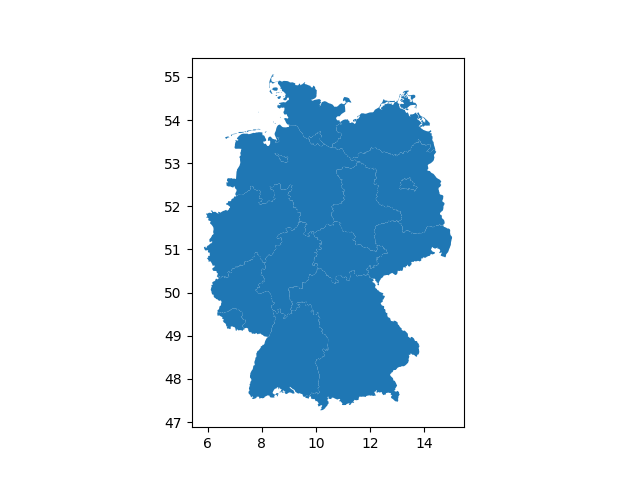

In [6]:
# Testing the geo-data
map_df.plot()

In [7]:
# Renaming a column to prepare the dataframe for merging
map_df.rename(columns={"GEN": "State"}, inplace=True)
map_df.head()

,USE,RS,RS_ALT,State,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."


## Combining two datasets into one and prepare for plotting

In [8]:
from functools import reduce

# Compile a list of dataframes you want to merge
data_frames = [map_df, state1]
# Merge
state_merged = reduce(
    lambda left, right: pd.merge(left, right, on=["State"], how="outer"), data_frames
)
# Prepare for plotting
state_merged.rename(
    columns={
        "Several times a week": 1,
        "Several times a month": 2,
        "About once a month": 3,
        "Less often": 4,
        "Never": 5,
    },
    inplace=True,
)
state_merged

,USE,RS,RS_ALT,State,SHAPE_LENG,SHAPE_AREA,geometry,1,2,3,4,5
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",18.4,16.4,7.5,19.4,38.3
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...",19.6,20.2,6.6,14.9,38.7
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...",16.8,17.0,4.3,11.7,50.2
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...",20.2,24.9,2.7,9.7,42.4
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...",17.3,22.9,4.8,9.4,45.5
5,2,07,070000000000,Rheinland-Pfalz,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ...",21.3,18.3,7.9,15.2,37.3
6,2,08,080000000000,Baden-Württemberg,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7...",21.8,23.5,6.9,13.3,34.5
7,2,09,090000000000,Bayern,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081...",25.0,21.5,7.6,11.7,34.2
8,2,10,100000000000,Saarland,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ...",15.1,16.9,4.2,16.5,47.4
9,2,11,110000000000,Berlin,1.807512e+05,8.864801e+08,"POLYGON ((13.61192 52.54332, 13.62461 52.53797...",18.1,21.8,6.3,13.7,40.0


## Visualization

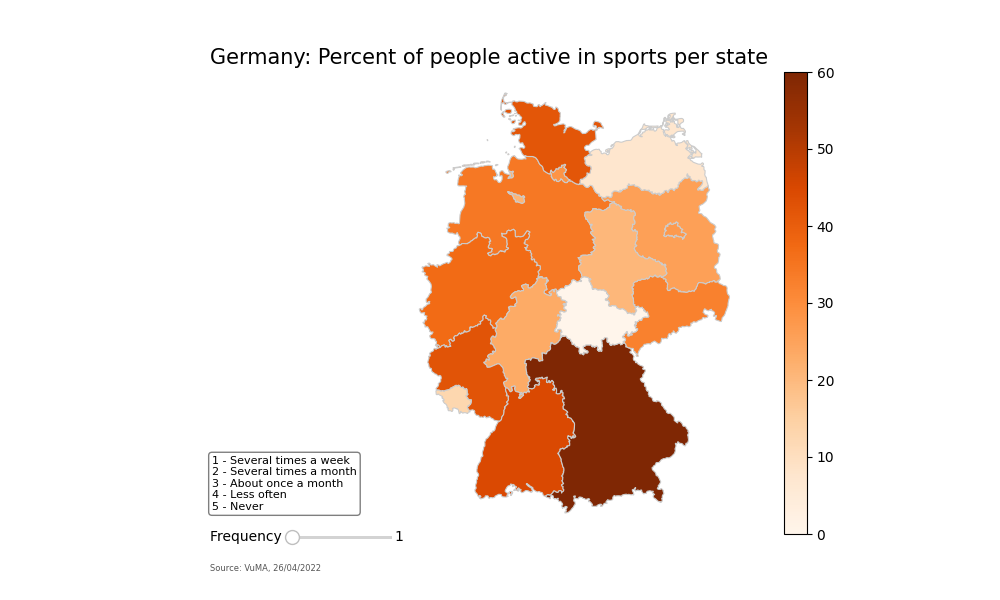

In [9]:
frequency = 1  # Default frequency
vmin, vmax = 0.00, 60.00  # Set the range of the choropleth
textstr = "\n".join(
    (
        "1 - Several times a week",
        "2 - Several times a month",
        "3 - About once a month",
        "4 - Less often",
        "5 - Never",
    )
)
props = dict(boxstyle="round", facecolor="white", alpha=0.5)

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
plot = state_merged.plot(
    column=frequency, cmap="Oranges", linewidth=0.8, ax=ax, edgecolor="0.8"
)
ax.axis("off")  # Remove the axis
sm = plt.cm.ScalarMappable(cmap="Oranges", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=plt.gca())
ax.set_title(
    "Germany: Percent of people active in sports per state",
    fontdict={"fontsize": "15", "fontweight": 3},
    x=0.25,
)
ax.annotate(
    "Source: VuMA, 26/04/2022",
    xy=(0.21, 0.06),
    xycoords="figure fraction",
    horizontalalignment="left",
    verticalalignment="top",
    fontsize=6,
    color="#555555",
)
plt.figtext(0.212, 0.15, textstr, fontsize=8, bbox=props)

# Building the slider
char_ax = plt.axes([0.292, 0.1, 0.1, 0.01], frameon=False)
char = Slider(
    char_ax,
    "Frequency  ",
    1,
    5,
    valfmt="%d",
    valinit=1,
    valstep=1,
    color="orange",
    alpha=0.5,
)


# The update function will redraw the plot each time the slider changes position
def update(val):
    frequency = int(char.val)
    plt.sca(ax)
    plt.cla()
    state_merged.plot(
        column=frequency, cmap="Oranges", linewidth=0.8, ax=ax, edgecolor="0.8"
    )
    ax.axis("off")  # Remove the axis
    ax.set_title(
        "Germany: Percent of people active in sports per state",
        fontdict={"fontsize": "15", "fontweight": 3},
        x=0.25,
    )
    ax.annotate(
        "Source: VuMA, 26/04/2022",
        xy=(0.21, 0.06),
        xycoords="figure fraction",
        horizontalalignment="left",
        verticalalignment="top",
        fontsize=6,
        color="#555555",
    )
    plt.figtext(0.212, 0.15, textstr, fontsize=8, bbox=props)
    fig.canvas.draw_idle()


# That sets the trigger
char.on_changed(update)
plt.show()

## Conclusion
As you can see from the visualization, the sportiest states tend to be in the south of Germany and in the left half of Germany. It is noticeable that once will push the frequency of sports into the range of "Less often" and "Never", the percentage part tends to shift to the upper right north of the country. A look at the real world map shows that the southern parts of Germany are mostly mountainous or at least hilly. This may allow easy access to natural outdoor activities and facilitate the practice of sports, especially winter sports such as skiing, ski jumping and the like.
For future or further analysis, perhaps the number of gyms and sports clubs, i.e. the general range of sports on offer, should also be taken into account to provide a more comprehensive view.
This was a fascinating assignment and I enjoyed it. Thank you, Coursera and University of Michigan for this assignment!

Noah Vodde

<a id='6'></a>
# References
1. [Numpy](https://numpy.org/doc/1.21/)
2. [Pandas](https://pandas.pydata.org/pandas-docs/version/1.3/index.html)
3. [GeoPandas](https://geopandas.org/en/v0.6.0/)
4. [Matplotlib](https://matplotlib.org/3.5.3/index.html)